# Diabetes Prediction

This is a capstone project for data science where I will be working on the entire data science project pipeline which comprises:

- Data loading
- Exploratory Data Analysis
- Feature engineering/ Data preprocessing
- Model building
- Hyper Parmameter Tuning

## 1. Data Loading

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


As per the project problem statement following features should not be having missing values:

- Glucose

- BloodPressure

- SkinThickness

- Insulin

- BMI

hence will have to impute the zero values

Replace 0 values with NaN

In [3]:
# Creating a deep copy just in case
df_1=df.copy(deep=True)
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] =df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)



In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


### Descriptive Statistics

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 2. Exploratory Data Ananlysis

1) Plotting these variables on a Histogram

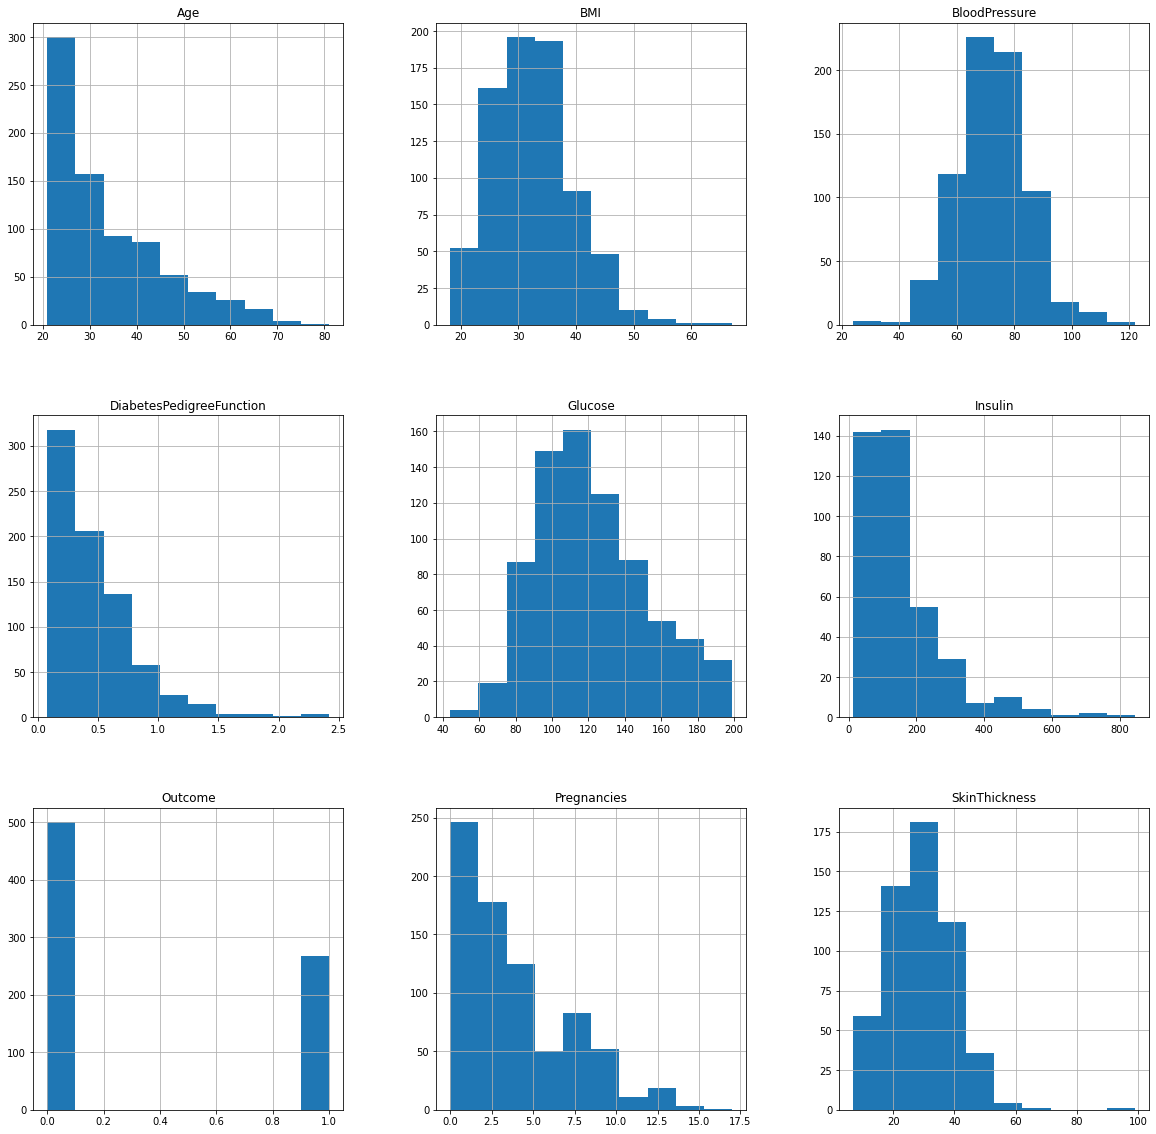

In [6]:
d= df.hist(figsize=(20,20))

2) With Boxplots

<AxesSubplot:xlabel='SkinThickness'>

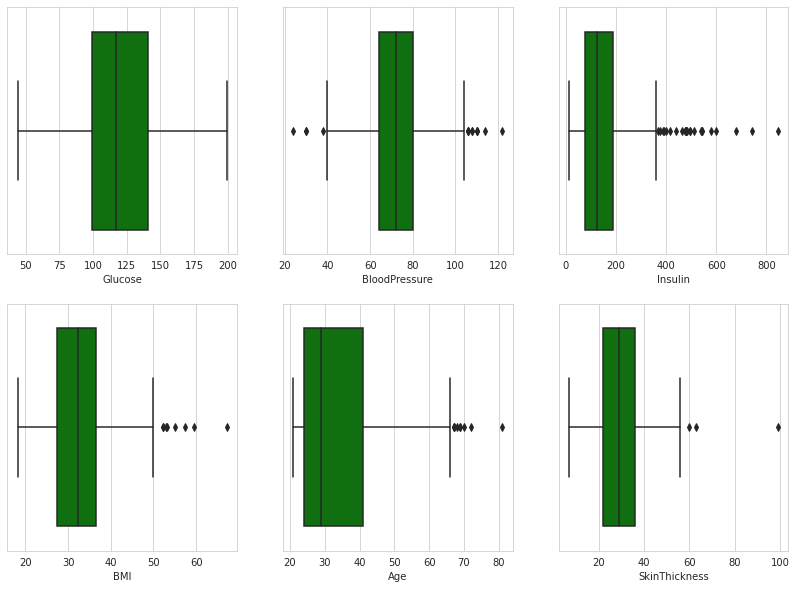

In [7]:
plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.boxplot(x='Glucose',data=df,color='g')
plt.subplot(2,3,2)
sns.boxplot(x='BloodPressure',data=df,color='g')
plt.subplot(2,3,3)
sns.boxplot(x='Insulin',data=df,color='g')
plt.subplot(2,3,4)
sns.boxplot(x='BMI',data=df,color='g')
plt.subplot(2,3,5)
sns.boxplot(x='Age',data=df,color='g')
plt.subplot(2,3,6)
sns.boxplot(x='SkinThickness',data=df,color='g')

Its apparent from the above boxplots that there is presence of outliers in all features except for Glucose

3) Plotting data types

In [8]:
d_vals= df.dtypes.value_counts()
d_vals=pd.DataFrame(d_vals,columns=['count'])
d_vals.reset_index()

,index,count
0,float64,6
1,int64,3


<AxesSubplot:>

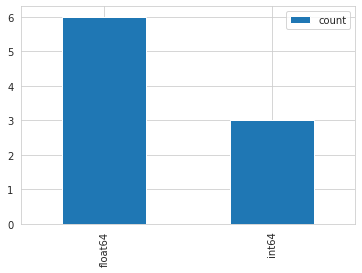

In [9]:
d_vals.plot(kind='bar')

4) Checking for class imbalance

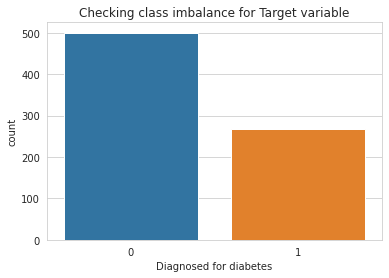

In [10]:
sns.countplot(x=df['Outcome'])
plt.title("Checking class imbalance for Target variable")
plt.xlabel('Diagnosed for diabetes')
plt.show()

This class imabalance is tolerable since making it nearly perfect through downsampling and oversampling could create a risk of overfitting or missing out of important records

5) Creating Scatter Matrix 

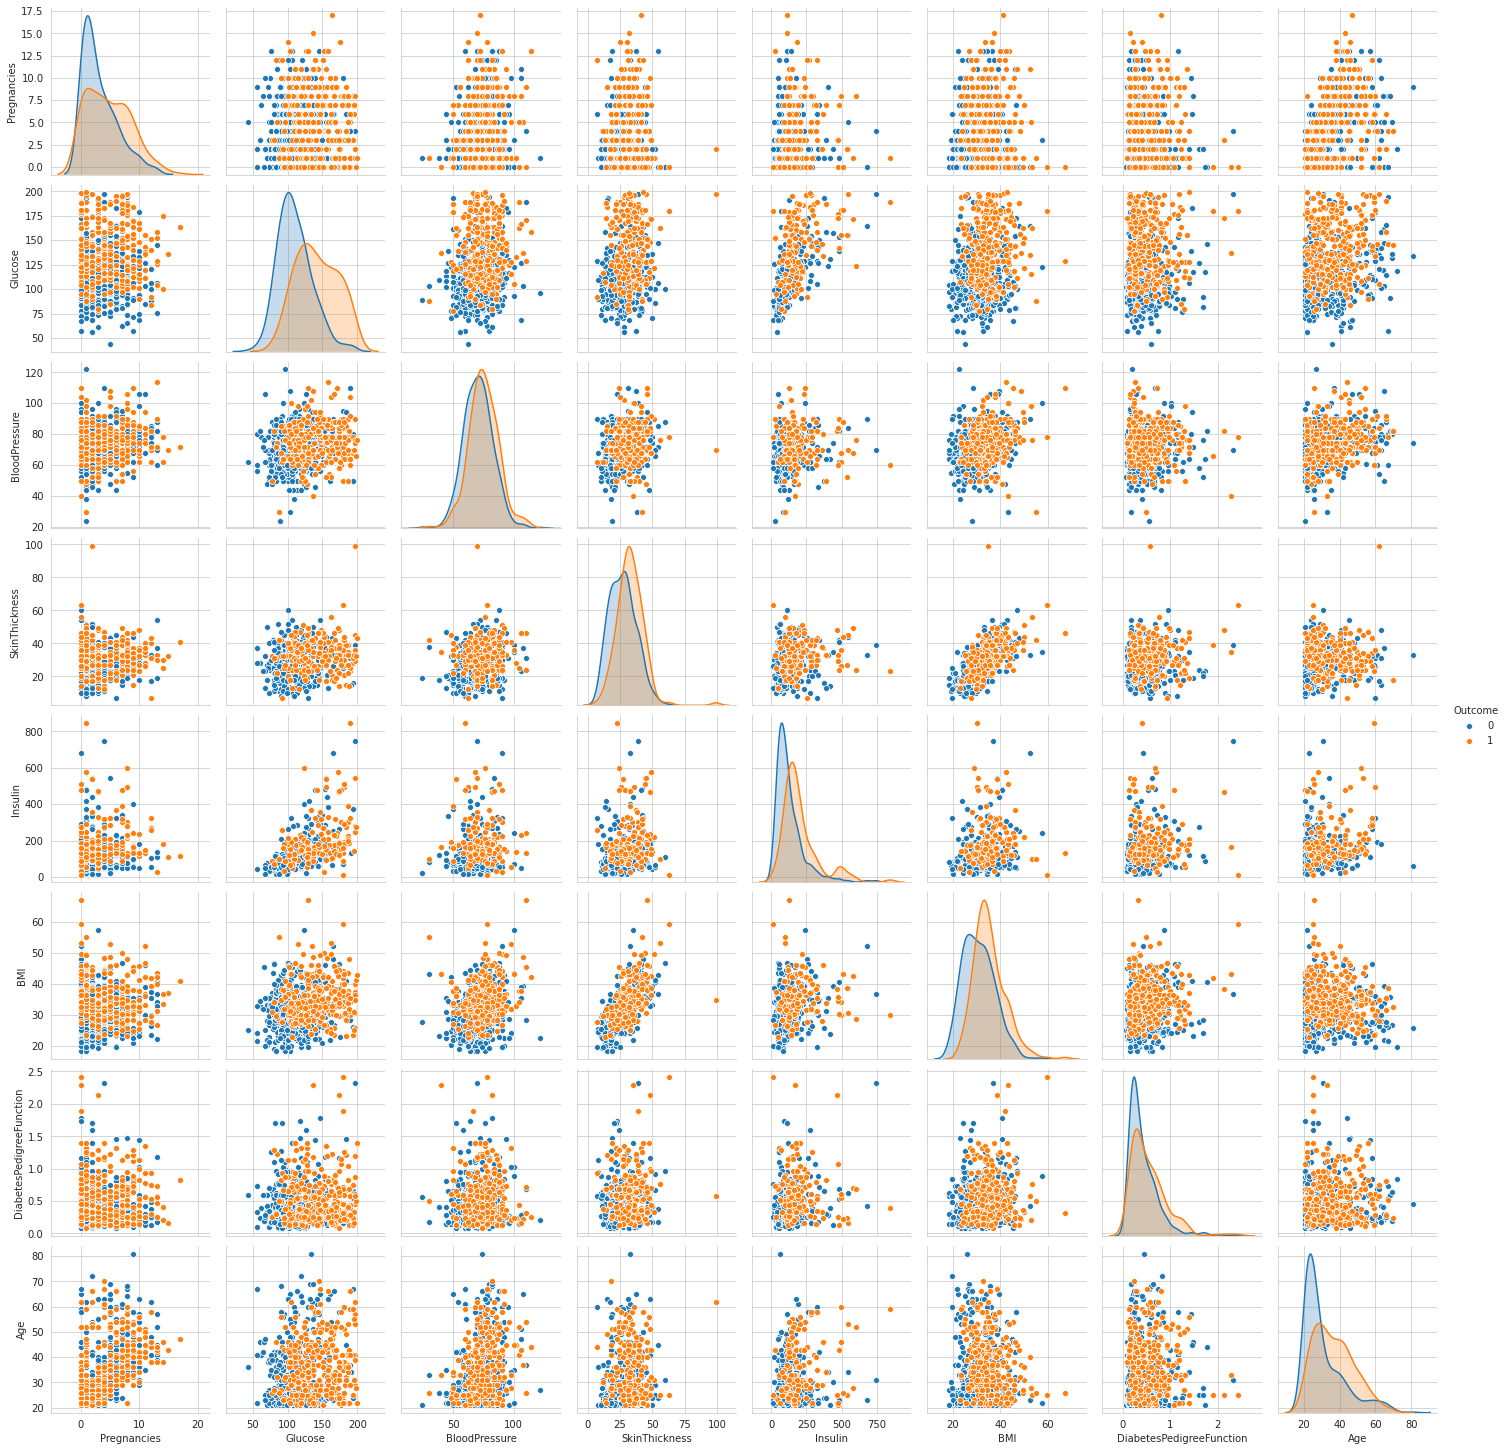

In [11]:
sns.pairplot(df,hue='Outcome')

6) Correlation Matrix

<AxesSubplot:>

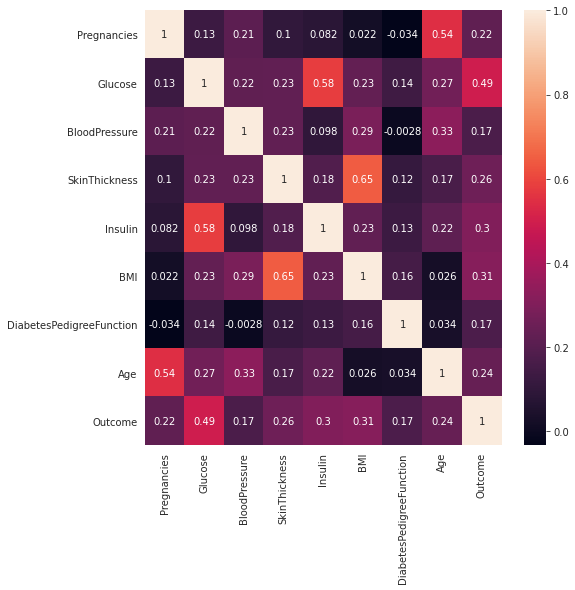

In [12]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,cbar=True)

## 3. Feature Engineering/ Data preprocessing

The objective for feature engineering is :

- Imputing missing values
- Treating outliers by capping
- Creating a seperate dataset for Capturing the range of ages for visualizations in tableau
- Feature scaling

### Imputation for missing values

In [13]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

We will be using the KNN imputer for treating missing values, since for features skinthickness and Insulin almost one-third and half of the values are missing therefore if we use mean imputation we might not get reliable results

In [14]:
from sklearn.impute import KNNImputer

In [15]:
impute=KNNImputer(n_neighbors=3,weights='distance')
imputed_data= impute.fit_transform(df)

In [16]:
imputed_data

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [17]:
data=pd.DataFrame(imputed_data,columns=df.columns)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.000000,125.346137,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.000000,68.364757,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,30.017257,204.219525,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0,1.0


### Outlier Treatment

We will be using Inter Quartile Range(IQR) method for detecting and capping outliers 

In [18]:
def IQR_cap(data,feature):
    perc_75= data[feature].quantile(0.75)
    perc_25= data[feature].quantile(0.25)
    iqr= perc_75-perc_25
    
    up_lim= perc_75 + 1.5*iqr
    low_lim= perc_25 - 1.5*iqr
    
    # capping
    data[feature]=np.where(data[feature]>up_lim,up_lim,
                           np.where(data[feature]<low_lim,low_lim,data[feature]))

In [19]:
# Split Indpendent and dependent features

X=data.drop('Outcome',axis=1)
y=data['Outcome']

In [20]:
for i in X.columns[:]:
    IQR_cap(X,i)

<AxesSubplot:xlabel='SkinThickness'>

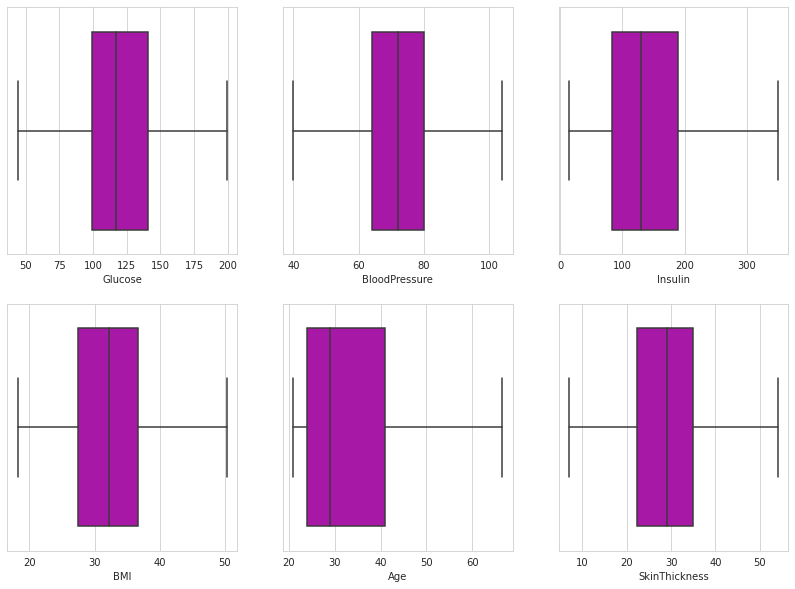

In [21]:
plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.boxplot(x='Glucose',data=X,color='m')
plt.subplot(2,3,2)
sns.boxplot(x='BloodPressure',data=X,color='m')
plt.subplot(2,3,3)
sns.boxplot(x='Insulin',data=X,color='m')
plt.subplot(2,3,4)
sns.boxplot(x='BMI',data=X,color='m')
plt.subplot(2,3,5)
sns.boxplot(x='Age',data=X,color='m')
plt.subplot(2,3,6)
sns.boxplot(x='SkinThickness',data=X,color='m')

Its clearly visible that the outliers have been successfully capped

Here we have to create bins for age range on the copy of the dataset, which will be used for Data visualization in Tableau

In [22]:
X1=X.copy()
X1['Age-range']=pd.cut(X1['Age'],bins=[20,25,30,35,40,45,50,55,60,65,70])

In [23]:
X1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Age-range
0,6.0,148.0,72.0,35.000000,125.346137,33.6,0.627,50.0,"(45, 50]"
1,1.0,85.0,66.0,29.000000,68.364757,26.6,0.351,31.0,"(30, 35]"
2,8.0,183.0,64.0,30.017257,204.219525,23.3,0.672,32.0,"(30, 35]"
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,"(20, 25]"
4,0.0,137.0,40.0,35.000000,168.000000,43.1,1.200,33.0,"(30, 35]"


### Feature Scaling

In [24]:
from sklearn.preprocessing import MinMaxScaler
mx=MinMaxScaler()
scaled= mx.fit_transform(X)
X_scaled= pd.DataFrame(scaled,columns=X.columns)

In [25]:
# Split train test set

X_train,X_test,y_train,y_test= train_test_split(X_scaled,y,test_size=0.3,shuffle=False)

In [26]:
X_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.444444,0.670968,0.50000,0.594336,0.330895,0.480499,0.489305,0.637363
1,0.074074,0.264516,0.40625,0.466978,0.161559,0.262090,0.243316,0.219780
2,0.592593,0.896774,0.37500,0.488571,0.565288,0.159126,0.529412,0.241758
3,0.074074,0.290323,0.40625,0.339621,0.237741,0.308892,0.079323,0.000000
4,0.000000,0.600000,0.00000,0.594336,0.457652,0.776911,1.000000,0.263736


In [27]:
type(y_train)

pandas.core.series.Series

In [28]:
y_train_df= pd.DataFrame(y_train,columns=['Outcome'])

In [29]:
y_test_df=pd.DataFrame(y_test,columns=['Outcome'])

In [30]:
type(y_train_df)

pandas.core.frame.DataFrame

In [31]:
y_train_df['Outcome'].value_counts()

0.0    348
1.0    189
Name: Outcome, dtype: int64

In [32]:
y_test_df['Outcome'].value_counts()

0.0    152
1.0     79
Name: Outcome, dtype: int64

## 4. Model Building

In the model building stage following will be done:

- Model creation
- Assessing feature importances
- Comparing models for validation
- Hyperparameter Optimization
- Model evaluation

The project requirement states that we first see the performance(accuracy) of KNN algorithm

In [33]:
knn=KNeighborsClassifier(n_neighbors=3,weights='distance')
knn.fit(X_train,y_train)
pred_y=knn.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,pred_y)

0.7359307359307359

In [35]:
for i in range(1,12):
    knn=KNeighborsClassifier(n_neighbors=i,weights='distance')
    knn.fit(X_train,y_train)
    pred_y=knn.predict(X_test)
    print('For {} Neighbors the accuracy score is {}'.format(i,accuracy_score(y_test,pred_y)))

For 1 Neighbors the accuracy score is 0.696969696969697
For 2 Neighbors the accuracy score is 0.696969696969697
For 3 Neighbors the accuracy score is 0.7359307359307359
For 4 Neighbors the accuracy score is 0.7575757575757576
For 5 Neighbors the accuracy score is 0.7619047619047619
For 6 Neighbors the accuracy score is 0.7532467532467533
For 7 Neighbors the accuracy score is 0.7792207792207793
For 8 Neighbors the accuracy score is 0.7792207792207793
For 9 Neighbors the accuracy score is 0.7575757575757576
For 10 Neighbors the accuracy score is 0.7662337662337663
For 11 Neighbors the accuracy score is 0.7705627705627706


Hence we shall choose the number of neighbors to be 7, because it corresponds to best accuracy. Nevertheless we shall explore other algorithms as well and see if we can get a better accuracy

Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(X_train,y_train)
pred_y1=lr.predict(X_test)

np.round(accuracy_score(y_test,pred_y1),4)

0.7879

Support Vector Classifier

In [37]:
from sklearn.svm import SVC

svm=SVC(kernel='linear')
svm.fit(X_train,y_train)
y_pred= svm.predict(X_test)

np.round(accuracy_score(y_test,y_pred),4)

0.7879

Random Forest classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred1= rf.predict(X_test)

np.round(accuracy_score(y_test,y_pred1),4)

0.7792

In [39]:
feature_importances=pd.DataFrame({'features':X_train.columns,'feature_importance':rf.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False)

,features,feature_importance
1,Glucose,0.215001
4,Insulin,0.153404
5,BMI,0.143927
3,SkinThickness,0.117134
7,Age,0.111280
6,DiabetesPedigreeFunction,0.109243
2,BloodPressure,0.081489
0,Pregnancies,0.068522


XGBoost Regressor

In [40]:
from xgboost import XGBClassifier

In [41]:
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred2= xgb.predict(X_test)

np.round(accuracy_score(y_test,y_pred2),4)

0.7532

Gaussian Naive Bayes

In [42]:
from sklearn.naive_bayes import GaussianNB


In [43]:
gnb= GaussianNB()
gnb.fit(X_train,y_train)
pred_class=gnb.predict(X_test)

np.round(accuracy_score(y_test,pred_class),4)

0.7749

Now I will take only the top features for the modelling part

In [44]:
X_train_df=X_train.copy(deep=True)
X_train_df.drop(['BloodPressure','Pregnancies'],axis=1,inplace=True)

In [45]:
X_test_df=X_test.copy(deep=True)
X_test_df.drop(['BloodPressure','Pregnancies'],axis=1,inplace=True)

It is clear that removing less important features infact reduced the models accuracy, therefore we will have to proceed with hyperparameter optimization

### Hyperparameter optimization

In [47]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [48]:
class RandomSearch(object):
    
    def __init__(self,X_train,y_train,model,hyperparameters):
        
        self.X_train=X_train
        self.y_train=y_train
        self.model=model
        self.hyperparameters=hyperparameters
        
    def RandomSearch(self):
        cv=10
        clf=RandomizedSearchCV(self.model,
                                 self.hyperparameters,
                                 random_state=1,
                                 n_iter=100,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1,
                                 )
        best_model=clf.fit(self.X_train,self.y_train)
        message=(best_model.best_score_,best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_
    
    def BestModelPredict(self,X_test):
        best_model,_=self.RandomSearch()
        pred=best_model.predict(X_test)
        return pred

Logistic Regression

In [49]:
model_lr = LogisticRegression()
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter distribution using uniform distribution
C = uniform(loc=0, scale=4)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [50]:
LR_grid= RandomSearch(X_train,y_train,model_lr,hyperparameters)
pred_LR=LR_grid.BestModelPredict(X_test)

Best: 0.769182 using {'C': 3.730229437354635, 'penalty': 'l2'}


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:925: UserWarning: One or more of the test scores are non-finite: [       nan 0.76918239 0.75981831 0.76355695 0.76726066 0.76355695
        nan        nan        nan        nan 0.76355695 0.76355695
        nan 0.76918239 0.76918239 0.75985325        nan        nan
 0.74678546        nan 0.75985325 0.76355695        nan 0.76355695
        nan 0.76167016 0.76540881 0.76355695 0.76355695 0.76540881
 0.76355695        nan        nan 0.76355695        nan        nan
 0.76355695 0.76355695        nan        nan 0.76174004 0.76918239
        nan        nan        nan 0.76918239 0.76355695 0.76355695
        nan 0.76352201        nan        nan 0.76540881        nan
 0.76355695        nan        nan        nan        nan        nan
 0.76359189        nan        nan        nan        nan 0.75981831
        nan        nan 0.76918239 0.76355695        nan        nan
 0.76355695 0.75796646        nan        nan 0.76167016 0

In [51]:
def floatingDecimals(f_val, dec=3):
        prc = "{:."+str(dec)+"f}" #first cast decimal as str
    #     print(prc) #str format output is {:.3f}
        return float(prc.format(f_val))

In [52]:
print('prediction on test set is:' ,floatingDecimals((y_test == pred_LR).mean(),7))

prediction on test set is: 0.7792208


Random Forest Classifier

In [53]:
model_RF= RandomForestClassifier()

In [54]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 500,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 64, 118, 173, 227, 282, 336, 391, 445, 500], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [55]:
RF_grid= RandomSearch(X_train,y_train,model_RF,random_grid)
pred_RF= RF_grid.BestModelPredict(X_test)

Best: 0.763732 using {'n_estimators': 822, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 282, 'criterion': 'entropy'}


In [56]:
print('prediction on test set is:' ,floatingDecimals((y_test == pred_RF).mean(),7))

prediction on test set is: 0.7878788


Support Vector Classifier

In [57]:
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = [ 'linear' , 'poly' , 'rbf' , 'sigmoid' ]
gamma=[1, 0.1, 0.01, 0.001, 0.0001]
param_grid = dict(C=c_values, kernel=kernel_values,gamma=gamma)
model_SVC = SVC()

In [58]:
SVC_grid= RandomSearch(X_train,y_train,model_SVC,param_grid)
pred_SVC= SVC_grid.BestModelPredict(X_test)

Best: 0.769182 using {'kernel': 'linear', 'gamma': 0.1, 'C': 2.0}


In [59]:
print('prediction on test set is:' ,floatingDecimals((y_test == pred_SVC).mean(),7))

prediction on test set is: 0.7878788


### Model Validation

In [69]:
kfold = StratifiedKFold(n_splits=5)

In [70]:
# KNN classifier
knn=KNeighborsClassifier(n_neighbors=7,weights='distance')
print(cross_val_score(knn,X_scaled,y,cv=kfold))

[0.71428571 0.70779221 0.72077922 0.77777778 0.7254902 ]


In [71]:
# Gaussian NB

gnb=GaussianNB()
print(cross_val_score(gnb,X_scaled,y,cv=kfold))

[0.73376623 0.72077922 0.72077922 0.76470588 0.75816993]


In [72]:
# SVC

svm=SVC(kernel='linear',gamma=0.01,C=2.0)
print(cross_val_score(svm,X_scaled,y,cv=kfold))

[0.75974026 0.73376623 0.77922078 0.79738562 0.76470588]


In [73]:
# RandomForest Classifier

RF= RandomForestClassifier(n_estimators=877,
                          min_samples_split=2,
                          min_samples_leaf=2,
                          max_features='sqrt',
                          max_depth=282,
                          criterion='entropy')

print(cross_val_score(RF,X_scaled,y,cv=kfold))

[0.74675325 0.74025974 0.73376623 0.81699346 0.75816993]


In [74]:
# Logistic Regression

LR= LogisticRegression(C=3.73022,penalty='l2')
print(cross_val_score(LR,X_scaled,y,cv=kfold))

[0.75324675 0.74025974 0.79220779 0.77777778 0.76470588]


In [75]:
# XG Boost Classifier

xgb=XGBClassifier()
print(cross_val_score(xgb,X_scaled,y,cv=kfold))

[0.66233766 0.7012987  0.74025974 0.78431373 0.74509804]


Of all the classifiers we have trained, Support Vector Classifier with linear kernel gave us the best performance after hyperparameter optimization and during Cross validation RandomForest Classifier gave us the best result. However the project requirement states that ROC_AUC values & precision-recall are to prioritised as the important metrics, so we will choose Random forests and Support Vector Machine and compare their classification reports

### Model Evaluation

1) Classification Report 

SVC

In [76]:
print(classification_report(y_test,pred_SVC))
print(confusion_matrix(y_test,pred_SVC))

              precision    recall  f1-score   support

         0.0       0.80      0.91      0.85       152
         1.0       0.76      0.56      0.64        79

    accuracy                           0.79       231
   macro avg       0.78      0.73      0.75       231
weighted avg       0.78      0.79      0.78       231

[[138  14]
 [ 35  44]]


Random Forest

In [78]:
print(classification_report(y_test,pred_RF))
print(confusion_matrix(y_test,pred_RF))

              precision    recall  f1-score   support

         0.0       0.81      0.89      0.85       152
         1.0       0.73      0.59      0.66        79

    accuracy                           0.79       231
   macro avg       0.77      0.74      0.75       231
weighted avg       0.78      0.79      0.78       231

[[135  17]
 [ 32  47]]


- In terms of sensitivity and specificity of the diabetes test in case of SVC the sensitivity(True Positive) is less than that of Random Forest, whereas for specificity(True Negative) random forest is less than SVC
- Since its a Healthcare domain we are more concerned with recall than the precision because it is very bad if a person who is actually positive is predicted as negative(False negative).Recall here helps us exactly with this since its formulation is TP/TP+FN, with that respect random forest gives us a better recall value for positve instances   

2) ROC-AUC

In [79]:
from sklearn.metrics import roc_curve, auc

In [82]:
y_score_RF= RandomForestClassifier(n_estimators=877,
                          min_samples_split=2,
                          min_samples_leaf=2,
                          max_features='sqrt',
                          max_depth=282,
                          criterion='entropy').fit(X_train,y_train).predict_proba(X_test)

y_score_svc= SVC(kernel='linear',gamma=0.1,C=2.0,probability=True).fit(X_train,y_train).predict_proba(X_test)

Random Forest Classifier

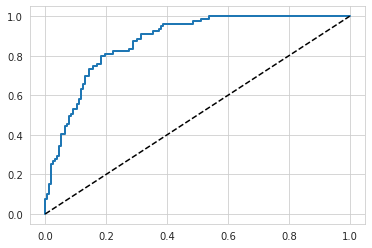

In [84]:
fpr, tpr, thresholds = roc_curve(y_test, y_score_RF[:,1])
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    
plot_roc_curve(fpr, tpr)
plt.show()

Support Vector Classifier

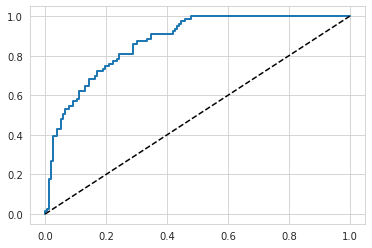

In [85]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_score_svc[:,1])
plot_roc_curve(fpr1, tpr1)
plt.show()

The ROC Curves of Both classifiers are hardly distinguishable

#### AUC

Random Forest Classifier

In [86]:
auc(fpr,tpr)

0.8740006662225184

Support Vector Classifier

In [87]:
auc(fpr1,tpr1)

0.870836109260493

AUC of Random Forest is better than Support Vector Machine